Input a Postal Code, Output Polygon Plot & Polygon Data

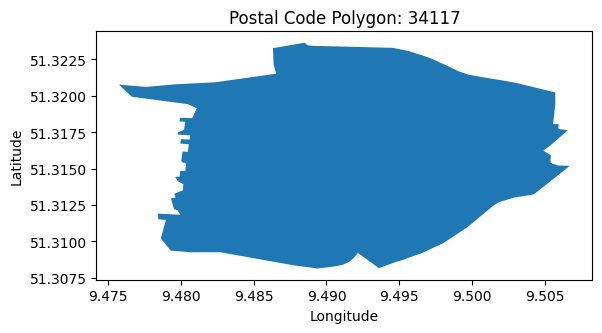

Selected Polygon Information:
POLYGON ((9.4757436 51.3207645, 9.4776032 51.3206073, 9.4796463 51.3207892, 9.4823482 51.320925, 9.4865459 51.3215156, 9.4863685 51.3221459, 9.4863246 51.3232692, 9.4885094 51.323645, 9.4886636 51.3235004, 9.4887893 51.3234516, 9.4891333 51.3234269, 9.491381 51.3233725, 9.4945481 51.3232914, 9.4956217 51.3230797, 9.4966232 51.3227593, 9.4971661 51.3225718, 9.4984949 51.321968, 9.499068 51.3216853, 9.4997424 51.3214482, 9.5009621 51.3212365, 9.5021754 51.3210394, 9.5030204 51.3208864, 9.5057135 51.3202296, 9.5057238 51.3194333, 9.5055623 51.3180545, 9.5059413 51.3180525, 9.5059333 51.3177153, 9.506594 51.3176393, 9.5054007 51.3166035, 9.5048986 51.3162318, 9.5054078 51.3159155, 9.5053889 51.3154057, 9.5056556 51.3152783, 9.505686 51.3153018, 9.5058858 51.3152088, 9.5067184 51.3151902, 9.5042477 51.3132263, 9.5028925 51.3130033, 9.5018798 51.312701, 9.5014944 51.3124757, 9.4996728 51.3109643, 9.4980295 51.3098796, 9.4964866 51.3091642, 9.4958408 51.3089457, 

In [2]:
import json
from shapely.geometry import shape, Polygon
import geopandas as gpd
import matplotlib.pyplot as plt
from pymongo import MongoClient

def connect_to_mongodb(database_name, collection_name):
    """
    Connects to MongoDB and returns the MongoDB client and collection.
    """
    client = MongoClient('localhost', 27017)
    db = client[database_name]
    collection = db[collection_name]
    return client, collection

def retrieve_data_from_mongodb(collection):
    """
    Retrieves GeoJSON data from MongoDB collection.
    """
    cursor = collection.find()
    geojson_data = {"type": "FeatureCollection", "features": []}

    for document in cursor:
        geojson_data["features"].append(document)

    return geojson_data

def coordinates_to_polygon(coordinates):
    """
    Converts coordinates to a Shapely Polygon.
    """
    return Polygon(coordinates)

def plot_polygon(postal_code_polygons, postal_code):
    """
    Plots the polygon for a given postal code and returns the polygon.
    """
    polygon = postal_code_polygons.get(postal_code)
    if polygon:
        gdf = gpd.GeoDataFrame(geometry=[polygon])
        gdf.plot()
        plt.title(f"Postal Code Polygon: {postal_code}")
        plt.xlabel("Longitude")
        plt.ylabel("Latitude")
        plt.show()
        return polygon
    else:
        print(f"No polygon found for postal code: {postal_code}")
        return None

# Example usage
if __name__ == "__main__":
    # MongoDB configuration
    database_name = "ZIP_Poly_Ger_Test"
    collection_name = "ZIP_Poly_Ger_Collection_Test"

    # Connect to MongoDB
    mongo_client, mongo_collection = connect_to_mongodb(database_name, collection_name)

    # Retrieve GeoJSON data from MongoDB
    geojson_data_from_mongo = retrieve_data_from_mongodb(mongo_collection)

    # Load GeoJSON data from MongoDB for comparison
    postal_code_polygons_mongo = {document.get('postal_code'): coordinates_to_polygon(document.get('geometry')['coordinates'][0]) for document in geojson_data_from_mongo['features']}

    # Input the postal code you want to plot
    input_postal_code = input("Enter a postal code: ")

    # Plot the polygon for the specified postal code and get the polygon
    selected_polygon = plot_polygon(postal_code_polygons_mongo, input_postal_code)

    # Output the polygon information
    if selected_polygon:
        print("Selected Polygon Information:")
        print(selected_polygon)

    # Close MongoDB connection when done
    mongo_client.close()
